<a href="https://colab.research.google.com/github/hiro-57/house-price-analysis/blob/main/house_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dir_path="/content/drive/MyDrive/python-for-biginner/house-prices-advanced-regression-techniques/"
train_df=pd.read_csv(dir_path+"train.csv")
test_df=pd.read_csv(dir_path+"test.csv")
#ÁõÆÁöÑ‰ΩèÂÆÖ‰æ°Ê†º„ÅÆ‰∫àÊ∏¨

In [ ]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

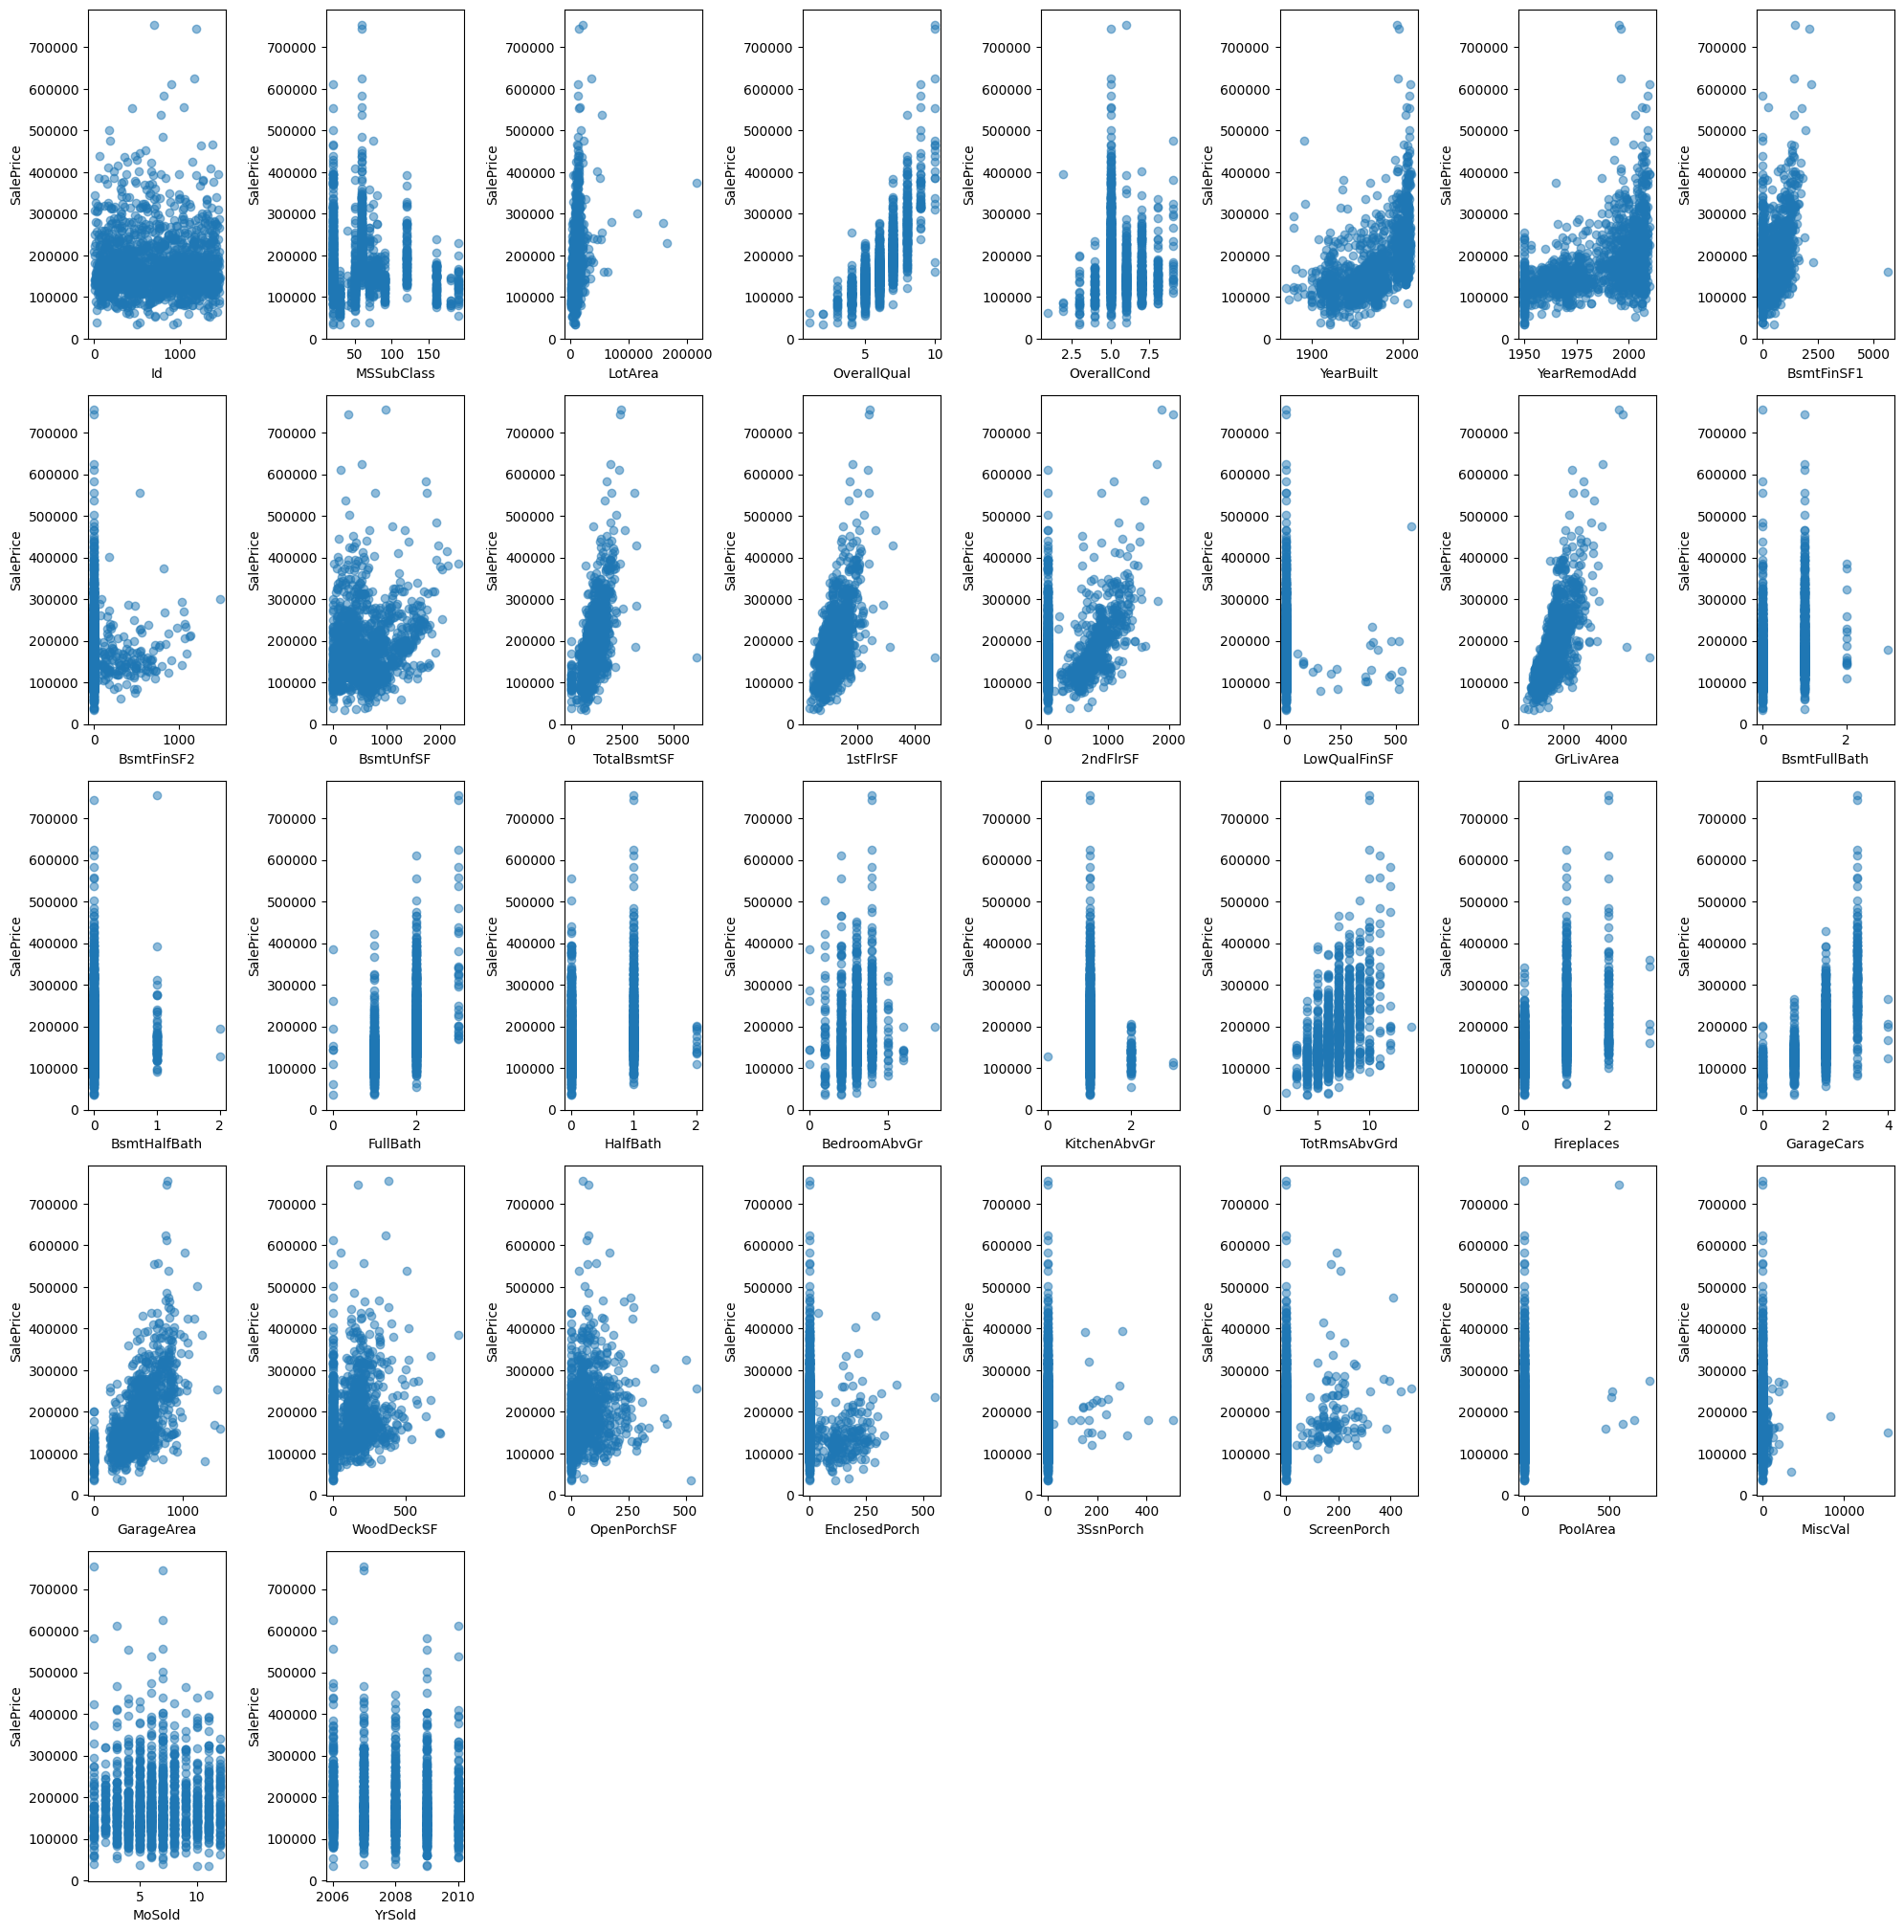

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Êï∞ÂÄ§Âûã„ÅßÊ¨†Êêç„Åå„Å™„ÅÑ„Ç´„É©„É†„ÇíÊäΩÂá∫
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
no_missing_cols = [col for col in numeric_cols if train_df[col].isnull().sum() == 0 and col != 'SalePrice']

# ÂèØË¶ñÂåñÔºàÊúÄÂ§ß80ÂÄã„Åæ„ÅßÔºâ
features = no_missing_cols[:80]  # Â§ö„Åô„Åé„Çã„Å®Âõ≥„ÅåÂ∞è„Åï„Åè„Å™„Çã„ÅÆ„ÅßÂà∂Èôê
plt.figure(figsize=(20, 40))  # „Çµ„Ç§„Ç∫Â§ß„Åç„ÇÅ

for i, col in enumerate(features):
    plt.subplot(10, 8, i + 1)
    plt.scatter(train_df[col], train_df['SalePrice'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()


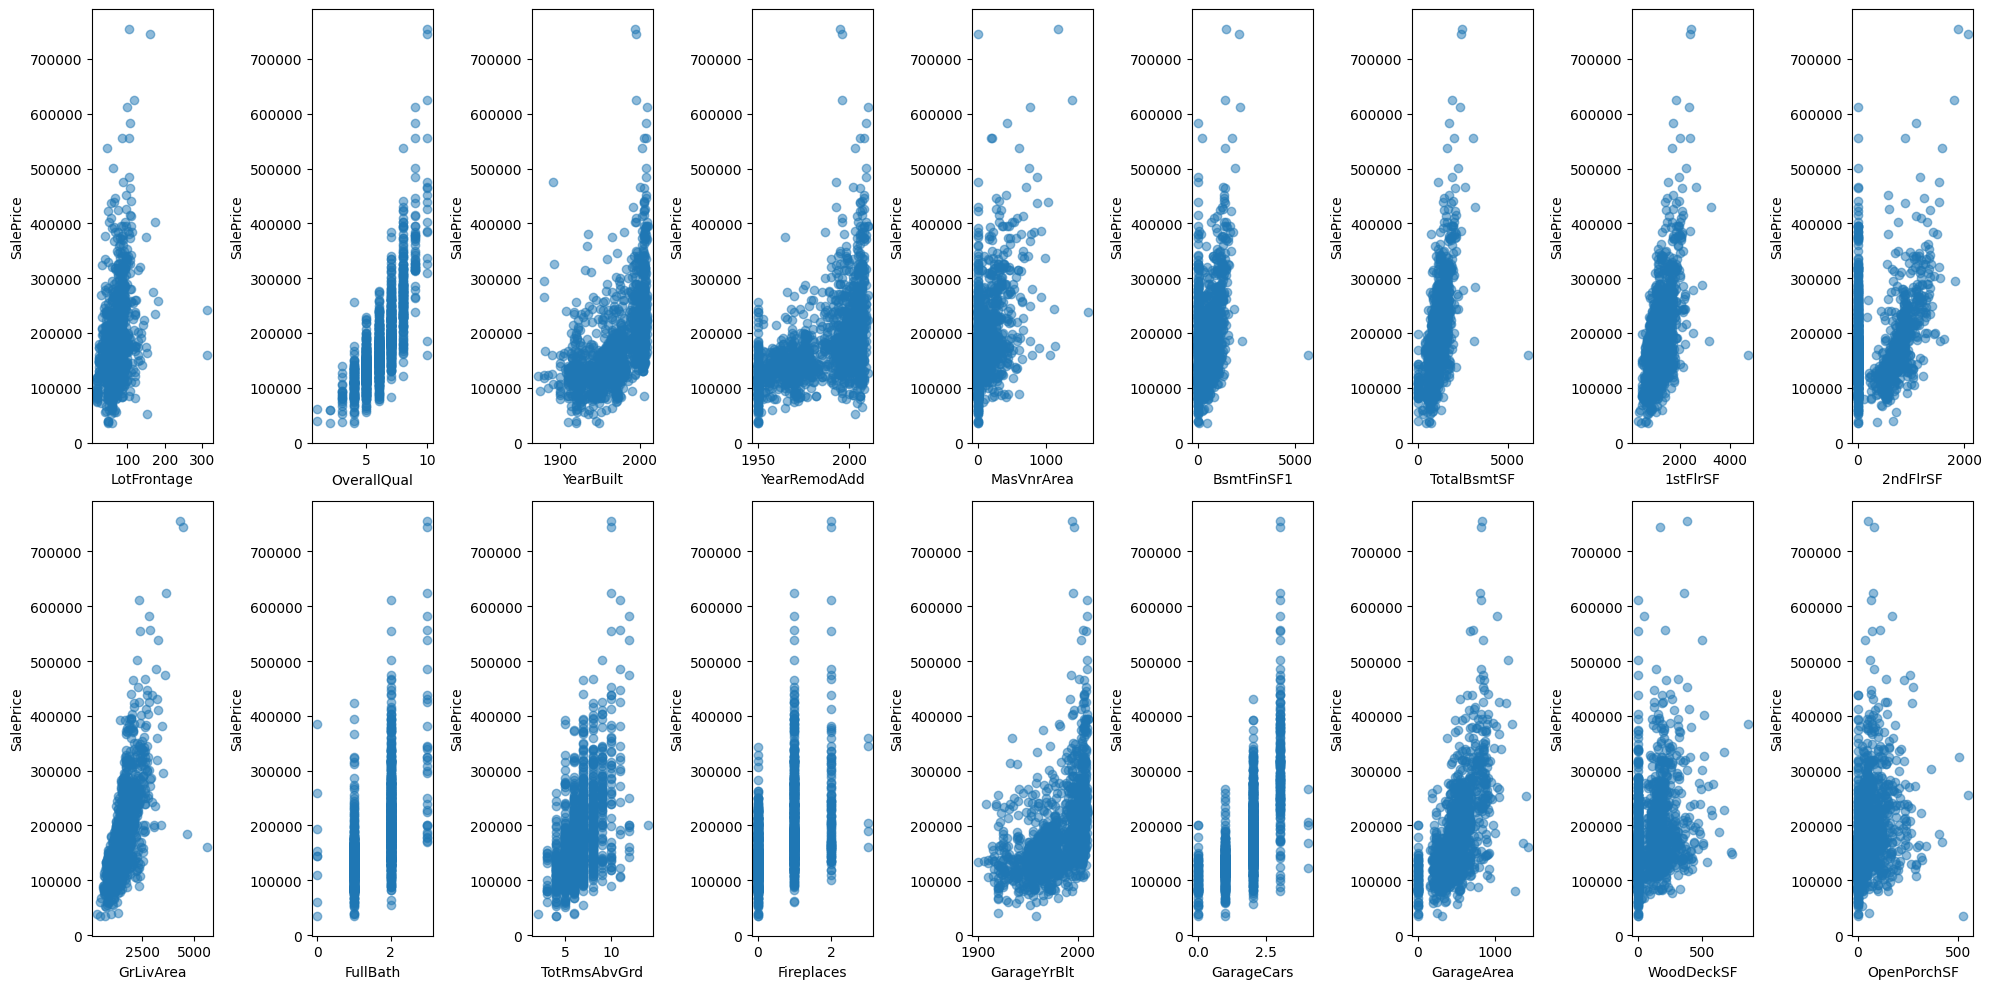

In [ ]:
# ‚ë† Êï∞ÂÄ§Âûã„Å†„Åë„ÇíÊäΩÂá∫ÔºàÁõ∏Èñ¢ÂàÜÊûê„ÇÑÊï£Â∏ÉÂõ≥„ÅØ„Åì„Çå„ÅßOKÔºâ
numeric_df = train_df.select_dtypes(include=['int64', 'float64'])

# ‚ë° SalePrice„Å®„ÅÆÁõ∏Èñ¢„ÇíÁ¢∫Ë™ç
corr_series = numeric_df.corr()['SalePrice'].drop('SalePrice')

# ‚ë¢ Áõ∏Èñ¢„ÅåÈ´ò„ÅÑ„Ç´„É©„É†„Å†„ÅëÂèñÂæó
high_corr_cols = corr_series[abs(corr_series) >= 0.3].index.tolist()

# ‚ë£ ÂèØË¶ñÂåñ
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

for i, col in enumerate(high_corr_cols):
    plt.subplot(2, (len(high_corr_cols) + 1) // 2, i + 1)
    plt.scatter(train_df[col], train_df['SalePrice'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# ---------------------------
# „Éá„Éº„Çø„ÅÆÊ∫ñÂÇô
# ---------------------------
features_list = [
    ['GrLivArea'],
    ['GrLivArea', 'OverallQual'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF']
]

print("üîç ÂêÑ„É¢„Éá„É´„ÅÆRMSEÔºà„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅßË©ï‰æ°Ôºâ")
print("-" * 40)

for i, features in enumerate(features_list, 1):
    # ÁâπÂæ¥Èáè„Å®ÁõÆÁöÑÂ§âÊï∞„ÅÆÊ∫ñÂÇô
    X = train_df[features]
    y = train_df['SalePrice']

    # Ë®ìÁ∑¥ÔºèÊ§úË®º„Éá„Éº„Çø„Å´ÂàÜÂâ≤Ôºà8:2Ôºâ
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    # Á∑öÂΩ¢ÂõûÂ∏∞„É¢„Éá„É´„ÅßÂ≠¶Áøí
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Ê§úË®º„Éá„Éº„Çø„Åß‰∫àÊ∏¨
    y_pred = model.predict(X_valid)

    # RMSE„ÅÆË®àÁÆó
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

    print(f"„É¢„Éá„É´{i}: ÁâπÂæ¥Èáè={features} ‚Üí RMSE = {rmse:.2f}")


üîç ÂêÑ„É¢„Éá„É´„ÅÆRMSEÔºà„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅßË©ï‰æ°Ôºâ
----------------------------------------
„É¢„Éá„É´1: ÁâπÂæ¥Èáè=['GrLivArea'] ‚Üí RMSE = 58471.76
„É¢„Éá„É´2: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual'] ‚Üí RMSE = 44159.60
„É¢„Éá„É´3: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual', 'TotalBsmtSF'] ‚Üí RMSE = 40836.96


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# ---------------------------
# „Éá„Éº„Çø„ÅÆÊ∫ñÂÇô
# ---------------------------
features_list = [
    ['GrLivArea'],
    ['GrLivArea', 'OverallQual'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF','YearBuilt'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF','YearBuilt','GarageCars',],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF','YearBuilt','GarageCars','FullBath',],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF','YearBuilt','GarageCars','FullBath','TotRmsAbvGrd']
]

print("üîç ÂêÑ„É¢„Éá„É´„ÅÆRMSEÔºà„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅßË©ï‰æ°Ôºâ")
print("-" * 40)

for i, features in enumerate(features_list, 1):
    # ÁâπÂæ¥Èáè„Å®ÁõÆÁöÑÂ§âÊï∞„ÅÆÊ∫ñÂÇô
    X = train_df[features]
    y = train_df['SalePrice']

    # Ë®ìÁ∑¥ÔºèÊ§úË®º„Éá„Éº„Çø„Å´ÂàÜÂâ≤Ôºà8:2Ôºâ
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    # Á∑öÂΩ¢ÂõûÂ∏∞„É¢„Éá„É´„ÅßÂ≠¶Áøí
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Ê§úË®º„Éá„Éº„Çø„Åß‰∫àÊ∏¨
    y_pred = model.predict(X_valid)

    # RMSE„ÅÆË®àÁÆó
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

    print(f"„É¢„Éá„É´{i}: ÁâπÂæ¥Èáè={features} ‚Üí RMSE = {rmse:.2f}")


üîç ÂêÑ„É¢„Éá„É´„ÅÆRMSEÔºà„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅßË©ï‰æ°Ôºâ
----------------------------------------
„É¢„Éá„É´1: ÁâπÂæ¥Èáè=['GrLivArea'] ‚Üí RMSE = 58471.76
„É¢„Éá„É´2: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual'] ‚Üí RMSE = 44159.60
„É¢„Éá„É´3: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual', 'TotalBsmtSF'] ‚Üí RMSE = 40836.96
„É¢„Éá„É´4: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF'] ‚Üí RMSE = 40642.00
„É¢„Éá„É´5: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt'] ‚Üí RMSE = 40093.97
„É¢„Éá„É´6: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'GarageCars'] ‚Üí RMSE = 39666.13
„É¢„Éá„É´7: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'GarageCars', 'FullBath'] ‚Üí RMSE = 39602.63
„É¢„Éá„É´8: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'GarageCars', 'FullBath', 'TotRmsAbvGrd'] ‚Üí RMSE = 39608.48


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

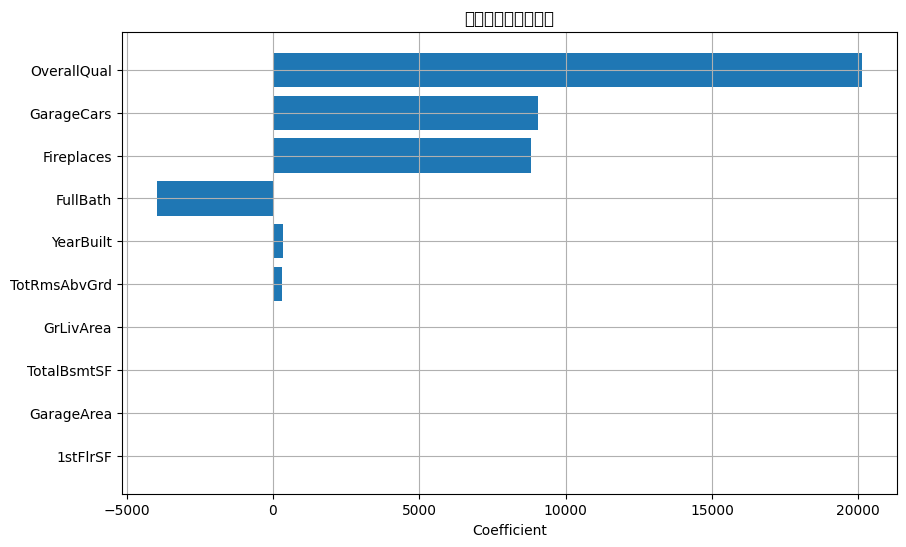

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ‰Ωø„ÅÑ„Åü„ÅÑ„Åô„Åπ„Å¶„ÅÆÁâπÂæ¥ÈáèÔºà‰ªÆ„Å´‰ª•‰∏ã„ÅÆ10ÂÄãÔºâ
features = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF',
            'YearBuilt', 'GarageCars', 'GarageArea', 'FullBath',
            'TotRmsAbvGrd', 'Fireplaces']

X = train_df[features]
y = train_df['SalePrice']

model = LinearRegression()
model.fit(X, y)

# ‰øÇÊï∞„ÅÆÁµ∂ÂØæÂÄ§„ÅåÂ§ß„Åç„ÅÑÈ†Ü„Å´„ÇΩ„Éº„Éà„Åó„Å¶ÂèØË¶ñÂåñ
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values(by='Abs_Coefficient', ascending=False)

# „Ç∞„É©„ÉïË°®Á§∫
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.title("ÂêÑÁâπÂæ¥Èáè„ÅÆÂõûÂ∏∞‰øÇÊï∞")
plt.xlabel("Coefficient")
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

# Ë°®„Åß„ÇÇË°®Á§∫ÔºàÂøÖË¶Å„Åß„ÅÇ„Çå„Å∞Ôºâ
#import ace_tools as tools; tools.display_dataframe_to_user(name="ÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶ÔºàÁ∑öÂΩ¢ÂõûÂ∏∞Ôºâ", dataframe=coef_df)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# ---------------------------
# „Éá„Éº„Çø„ÅÆÊ∫ñÂÇô
# ---------------------------
features_list = [
    ['GrLivArea'],
    ['GrLivArea', 'OverallQual'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF','YearBuilt'],
    ['OverallQual','GarageCars','Fireplaces','GrLivArea'],

]

print("üîç ÂêÑ„É¢„Éá„É´„ÅÆRMSEÔºà„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅßË©ï‰æ°Ôºâ")
print("-" * 40)

for i, features in enumerate(features_list, 1):
    # ÁâπÂæ¥Èáè„Å®ÁõÆÁöÑÂ§âÊï∞„ÅÆÊ∫ñÂÇô
    X = train_df[features]
    y = train_df['SalePrice']

    # Ë®ìÁ∑¥ÔºèÊ§úË®º„Éá„Éº„Çø„Å´ÂàÜÂâ≤Ôºà8:2Ôºâ
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    # Á∑öÂΩ¢ÂõûÂ∏∞„É¢„Éá„É´„ÅßÂ≠¶Áøí
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Ê§úË®º„Éá„Éº„Çø„Åß‰∫àÊ∏¨
    y_pred = model.predict(X_valid)

    # RMSE„ÅÆË®àÁÆó
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

    print(f"„É¢„Éá„É´{i}: ÁâπÂæ¥Èáè={features} ‚Üí RMSE = {rmse:.2f}")


üîç ÂêÑ„É¢„Éá„É´„ÅÆRMSEÔºà„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅßË©ï‰æ°Ôºâ
----------------------------------------
„É¢„Éá„É´1: ÁâπÂæ¥Èáè=['GrLivArea'] ‚Üí RMSE = 58471.76
„É¢„Éá„É´2: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual'] ‚Üí RMSE = 44159.60
„É¢„Éá„É´3: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual', 'TotalBsmtSF'] ‚Üí RMSE = 40836.96
„É¢„Éá„É´4: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF'] ‚Üí RMSE = 40642.00
„É¢„Éá„É´5: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt'] ‚Üí RMSE = 40093.97
„É¢„Éá„É´6: ÁâπÂæ¥Èáè=['OverallQual', 'GarageCars', 'Fireplaces', 'GrLivArea'] ‚Üí RMSE = 42691.45


In [ ]:
!pip install -U scikit-learn


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28310 (\N{CJK UNIFIED IDEOGRAPH-6E96}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

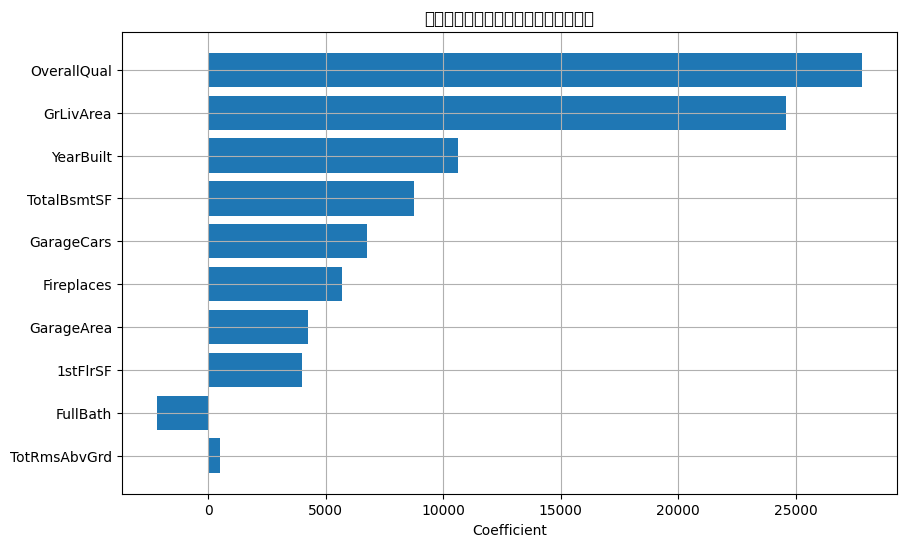

Feature   Coefficient  Abs_Coefficient
1   OverallQual  27811.596034     27811.596034
0     GrLivArea  24587.344550     24587.344550
4     YearBuilt  10611.841942     10611.841942
2   TotalBsmtSF   8773.473112      8773.473112
5    GarageCars   6770.688148      6770.688148
9    Fireplaces   5692.930872      5692.930872
6    GarageArea   4240.468010      4240.468010
3      1stFlrSF   4002.740478      4002.740478
7      FullBath  -2181.559446      2181.559446
8  TotRmsAbvGrd    510.311317       510.311317

In [ ]:
from sklearn.preprocessing import StandardScaler

# ÁâπÂæ¥Èáè„É™„Çπ„ÉàÔºàÂøÖË¶Å„Å´Âøú„Åò„Å¶Ë™øÊï¥ÂèØËÉΩÔºâ
features = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF',
            'YearBuilt', 'GarageCars', 'GarageArea', 'FullBath',
            'TotRmsAbvGrd', 'Fireplaces']

# ÂÖ•Âäõ„ÉªÂá∫Âäõ
X = train_df[features]
y = train_df['SalePrice']

# Ê®ôÊ∫ñÂåñ
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Á∑öÂΩ¢ÂõûÂ∏∞„É¢„Éá„É´
model = LinearRegression()
model.fit(X_scaled, y)

# ‰øÇÊï∞„ÇíDataFrameÂåñ
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values(by='Abs_Coefficient', ascending=False)

# Ê£í„Ç∞„É©„ÉïË°®Á§∫
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.title("Ê®ôÊ∫ñÂåñÂæå„ÅÆÂõûÂ∏∞‰øÇÊï∞ÔºàÈáçË¶ÅÂ∫¶„ÅÆÊØîËºÉÔºâ")
plt.xlabel("Coefficient")
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

# Ë°®„Åß„ÇÇÁ¢∫Ë™ç
display(coef_df)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# ---------------------------
# „Éá„Éº„Çø„ÅÆÊ∫ñÂÇô
# ---------------------------
features_list = [
    ['GrLivArea'],
    ['GrLivArea', 'OverallQual'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF','YearBuilt'],
    ['OverallQual','GarageCars','Fireplaces','GrLivArea'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF',
     'YearBuilt', 'GarageCars', 'GarageArea','Fireplaces'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF',
     'YearBuilt', 'GarageArea','Fireplaces']
]

print("üîç ÂêÑ„É¢„Éá„É´„ÅÆRMSEÔºà„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅßË©ï‰æ°Ôºâ")
print("-" * 40)

for i, features in enumerate(features_list, 1):
    # ÁâπÂæ¥Èáè„Å®ÁõÆÁöÑÂ§âÊï∞„ÅÆÊ∫ñÂÇô
    X = train_df[features]
    y = train_df['SalePrice']

    # Ë®ìÁ∑¥ÔºèÊ§úË®º„Éá„Éº„Çø„Å´ÂàÜÂâ≤Ôºà8:2Ôºâ
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    # Á∑öÂΩ¢ÂõûÂ∏∞„É¢„Éá„É´„ÅßÂ≠¶Áøí
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Ê§úË®º„Éá„Éº„Çø„Åß‰∫àÊ∏¨
    y_pred = model.predict(X_valid)

    # RMSE„ÅÆË®àÁÆó
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

    print(f"„É¢„Éá„É´{i}: ÁâπÂæ¥Èáè={features} ‚Üí RMSE = {rmse:.2f}")


üîç ÂêÑ„É¢„Éá„É´„ÅÆRMSEÔºà„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅßË©ï‰æ°Ôºâ
----------------------------------------
„É¢„Éá„É´1: ÁâπÂæ¥Èáè=['GrLivArea'] ‚Üí RMSE = 58471.76
„É¢„Éá„É´2: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual'] ‚Üí RMSE = 44159.60
„É¢„Éá„É´3: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual', 'TotalBsmtSF'] ‚Üí RMSE = 40836.96
„É¢„Éá„É´4: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF'] ‚Üí RMSE = 40642.00
„É¢„Éá„É´5: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt'] ‚Üí RMSE = 40093.97
„É¢„Éá„É´6: ÁâπÂæ¥Èáè=['OverallQual', 'GarageCars', 'Fireplaces', 'GrLivArea'] ‚Üí RMSE = 42691.45
„É¢„Éá„É´7: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'GarageCars', 'GarageArea', 'Fireplaces'] ‚Üí RMSE = 39424.97
„É¢„Éá„É´8: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'GarageArea', 'Fireplaces'] ‚Üí RMSE = 39396.64


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# „É¢„Éá„É´7„ÅÆÂÖ®ÁâπÂæ¥Èáè
base_features = [
    'GrLivArea', 'OverallQual', 'TotalBsmtSF',
    '1stFlrSF', 'YearBuilt', 'GarageCars',
    'GarageArea', 'Fireplaces'
]

print("üîç „É¢„Éá„É´7„ÅÆÁâπÂæ¥Èáè„Åã„Çâ1„Å§„Åö„Å§ÂâäÈô§„Åó„Å¶RMSE„ÇíÊØîËºÉ")
print("-" * 50)

# Âü∫Ê∫ñRMSEÔºàÂÖ®ÈÉ®ÂÖ•„ÇäÔºâ
X_base = train_df[base_features]
y_base = train_df['SalePrice']
X_train_base, X_valid_base, y_train_base, y_valid_base = train_test_split(X_base, y_base, test_size=0.2, random_state=42)
model_base = LinearRegression()
model_base.fit(X_train_base, y_train_base)
y_pred_base = model_base.predict(X_valid_base)
rmse_base = np.sqrt(mean_squared_error(y_valid_base, y_pred_base))
print(f"Âü∫Ê∫ñ„É¢„Éá„É´ÔºàÂÖ®ÁâπÂæ¥ÈáèÔºâ‚Üí RMSE = {rmse_base:.2f}")

# 1„Å§„Åö„Å§Èô§Â§ñ„Åó„Å¶ÊØîËºÉ
for feature_to_drop in base_features:
    selected_features = [f for f in base_features if f != feature_to_drop]

    X = train_df[selected_features]
    y = train_df['SalePrice']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

    print(f"‚ùå Èô§Â§ñ: {feature_to_drop} ‚Üí RMSE = {rmse:.2f}")


üîç „É¢„Éá„É´7„ÅÆÁâπÂæ¥Èáè„Åã„Çâ1„Å§„Åö„Å§ÂâäÈô§„Åó„Å¶RMSE„ÇíÊØîËºÉ
--------------------------------------------------
Âü∫Ê∫ñ„É¢„Éá„É´ÔºàÂÖ®ÁâπÂæ¥ÈáèÔºâ‚Üí RMSE = 39424.97
‚ùå Èô§Â§ñ: GrLivArea ‚Üí RMSE = 43903.09
‚ùå Èô§Â§ñ: OverallQual ‚Üí RMSE = 42838.86
‚ùå Èô§Â§ñ: TotalBsmtSF ‚Üí RMSE = 40109.11
‚ùå Èô§Â§ñ: 1stFlrSF ‚Üí RMSE = 39484.28
‚ùå Èô§Â§ñ: YearBuilt ‚Üí RMSE = 39772.64
‚ùå Èô§Â§ñ: GarageCars ‚Üí RMSE = 39396.64
‚ùå Èô§Â§ñ: GarageArea ‚Üí RMSE = 39506.09
‚ùå Èô§Â§ñ: Fireplaces ‚Üí RMSE = 39610.44


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# ---------------------------
# „Éá„Éº„Çø„ÅÆÊ∫ñÂÇô
# ---------------------------
features_list = [
    ['GrLivArea'],
    ['GrLivArea', 'OverallQual'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF','YearBuilt'],
    ['OverallQual','GarageCars','Fireplaces','GrLivArea'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF',
     'YearBuilt', 'GarageCars', 'GarageArea','Fireplaces'],
    ['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF',
     'YearBuilt', 'GarageArea','Fireplaces'],
      ['GrLivArea', 'OverallQual', 'TotalBsmtSF',
     'YearBuilt', 'GarageArea','Fireplaces']
]

print("üîç ÂêÑ„É¢„Éá„É´„ÅÆRMSEÔºà„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅßË©ï‰æ°Ôºâ")
print("-" * 40)

for i, features in enumerate(features_list, 1):
    # ÁâπÂæ¥Èáè„Å®ÁõÆÁöÑÂ§âÊï∞„ÅÆÊ∫ñÂÇô
    X = train_df[features]
    y = train_df['SalePrice']

    # Ë®ìÁ∑¥ÔºèÊ§úË®º„Éá„Éº„Çø„Å´ÂàÜÂâ≤Ôºà8:2Ôºâ
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    # Á∑öÂΩ¢ÂõûÂ∏∞„É¢„Éá„É´„ÅßÂ≠¶Áøí
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Ê§úË®º„Éá„Éº„Çø„Åß‰∫àÊ∏¨
    y_pred = model.predict(X_valid)

    # RMSE„ÅÆË®àÁÆó
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

    print(f"„É¢„Éá„É´{i}: ÁâπÂæ¥Èáè={features} ‚Üí RMSE = {rmse:.2f}")


üîç ÂêÑ„É¢„Éá„É´„ÅÆRMSEÔºà„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅßË©ï‰æ°Ôºâ
----------------------------------------
„É¢„Éá„É´1: ÁâπÂæ¥Èáè=['GrLivArea'] ‚Üí RMSE = 58471.76
„É¢„Éá„É´2: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual'] ‚Üí RMSE = 44159.60
„É¢„Éá„É´3: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual', 'TotalBsmtSF'] ‚Üí RMSE = 40836.96
„É¢„Éá„É´4: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF'] ‚Üí RMSE = 40642.00
„É¢„Éá„É´5: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt'] ‚Üí RMSE = 40093.97
„É¢„Éá„É´6: ÁâπÂæ¥Èáè=['OverallQual', 'GarageCars', 'Fireplaces', 'GrLivArea'] ‚Üí RMSE = 42691.45
„É¢„Éá„É´7: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'GarageCars', 'GarageArea', 'Fireplaces'] ‚Üí RMSE = 39424.97
„É¢„Éá„É´8: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'GarageArea', 'Fireplaces'] ‚Üí RMSE = 39396.64
„É¢„Éá„É´9: ÁâπÂæ¥Èáè=['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'GarageAr

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# ÁâπÂæ¥Èáè„Å®ÁõÆÁöÑÂ§âÊï∞
features = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'GarageArea', 'Fireplaces']
X = train_df[features]
y = train_df['SalePrice']

# „Éá„Éº„ÇøÂàÜÂâ≤
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# „É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà„ÅßÂ≠¶Áøí
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# ‰∫àÊ∏¨„Å®Ë©ï‰æ°
y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

print(f"üìä RandomForest RMSE: {rmse:.2f}")


üìä RandomForest RMSE: 29825.44


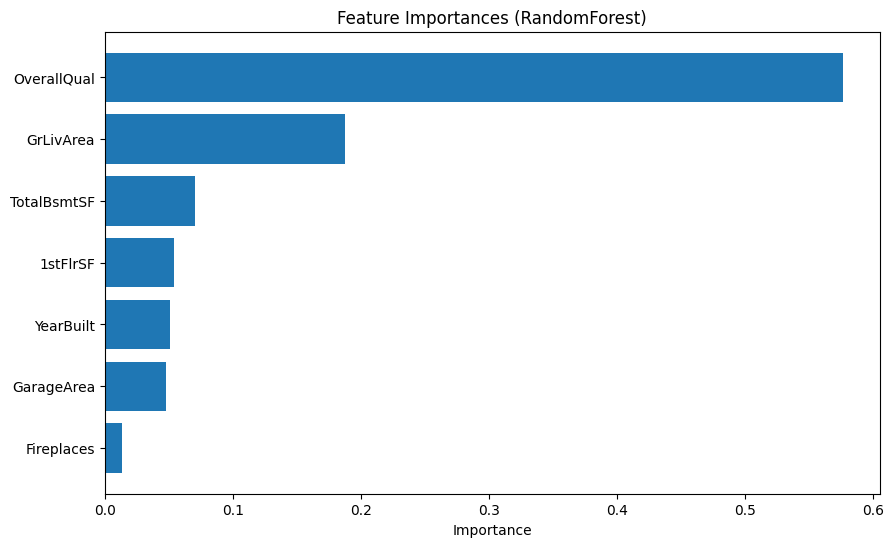

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶„ÇíÂèØË¶ñÂåñ
importances = model.feature_importances_
feature_names = X.columns

# „Éá„Éº„Çø„Éï„É¨„Éº„É†Âåñ„Åó„Å¶‰∏¶„ÅπÊõø„Åà
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# „Ç∞„É©„ÉïË°®Á§∫
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importances (RandomForest)")
plt.show()


üìä RandomForestÔºàÂÖ®ÁâπÂæ¥ÈáèÔºâRMSE: 29354.35


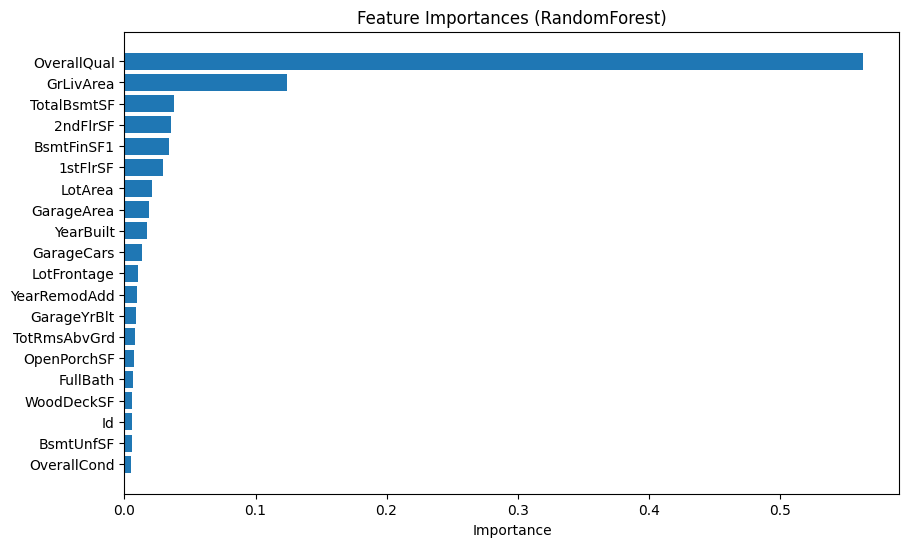

In [ ]:
# ÂøÖË¶Å„Å™„É©„Ç§„Éñ„É©„É™
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# -------------------------------
# Step 1: Êï∞ÂÄ§ÁâπÂæ¥Èáè„ÅÆ„ÅøÊäΩÂá∫
# -------------------------------
# SalePrice„ÅØÁõÆÁöÑÂ§âÊï∞„Å™„ÅÆ„ÅßÈô§Â§ñ„Åõ„Åö‰øùÊåÅ
numeric_df = train_df.select_dtypes(include=[np.number])

# Ê¨†ÊêçÂÄ§„ÅÆÂá¶ÁêÜÔºàÂçòÁ¥î„Å´Âπ≥Âùá„ÅßÂüã„ÇÅ„ÇãÔºâ
numeric_df = numeric_df.fillna(numeric_df.mean())

# -------------------------------
# Step 2: ÁâπÂæ¥Èáè„ÉªÁõÆÁöÑÂ§âÊï∞„ÅÆÂàÜÂâ≤
# -------------------------------
X = numeric_df.drop("SalePrice", axis=1)
y = numeric_df["SalePrice"]

# -------------------------------
# Step 3: Ë®ìÁ∑¥„ÉªÊ§úË®º„Éá„Éº„Çø„Å´ÂàÜÂâ≤
# -------------------------------
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# Step 4: „É¢„Éá„É´Â≠¶Áøí„Éª‰∫àÊ∏¨
# -------------------------------
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

print(f"üìä RandomForestÔºàÂÖ®ÁâπÂæ¥ÈáèÔºâRMSE: {rmse:.2f}")

# -------------------------------
# Step 5: ÈáçË¶ÅÂ∫¶„ÅÆÂèØË¶ñÂåñ
# -------------------------------
importances = model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# ÂèØË¶ñÂåñÔºà‰∏ä‰Ωç20ÂÄãÔºâ
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"].head(20)[::-1], importance_df["Importance"].head(20)[::-1])
plt.xlabel("Importance")
plt.title("Feature Importances (RandomForest)")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# -----------------------------
# ÁâπÂæ¥ÈáèÔºà„É¶„Éº„Ç∂„Éº„ÅåÂàÜÊûê„Å´‰Ωø„Å£„Å¶„ÅÑ„ÅüÈáçË¶ÅÂ§âÊï∞„Åü„Å°Ôºâ
# -----------------------------
features = [
    'OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1',
    '1stFlrSF', 'LotArea', 'GarageArea', 'YearBuilt', 'GarageCars',
    'LotFrontage', 'YearRemodAdd', 'GarageYrBlt', 'TotRmsAbvGrd',
    'OpenPorchSF', 'FullBath', 'WoodDeckSF', 'BsmtUnfSF', 'OverallCond'
]

# -----------------------------
# ÁâπÂæ¥Èáè„ÉªÁõÆÁöÑÂ§âÊï∞„ÅÆÂàÜÂâ≤
# -----------------------------
X = train_df[features]
y = train_df['SalePrice']

# -----------------------------
# Â≠¶ÁøíÔºèÊ§úË®ºÁî®„Å´ÂàÜÂâ≤
# -----------------------------
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# Âü∫Ê∫ñ„É¢„Éá„É´ÔºàÂÖ®ÁâπÂæ¥ÈáèÔºâ
# -----------------------------
base_model = RandomForestRegressor(random_state=42)
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_valid)
rmse_base = np.sqrt(mean_squared_error(y_valid, y_pred_base))

print("üîç „Ç¢„Éñ„É¨„Éº„Ç∑„Éß„É≥ÂàÜÊûêÔºàÁâπÂæ¥Èáè„Çí1„Å§„Åö„Å§ÂâäÈô§Ôºâ")
print("------------------------------------------------")
print(f"Âü∫Ê∫ñ„É¢„Éá„É´ÔºàÂÖ®ÁâπÂæ¥ÈáèÔºâ‚Üí RMSE = {rmse_base:.2f}")

# -----------------------------
# 1„Å§„Åö„Å§Èô§Â§ñ„Åó„Å¶ÊØîËºÉ
# -----------------------------
for col in features:
    reduced_features = [f for f in features if f != col]

    # ‚ùå train_df „Åã„ÇâÂèñ„Å£„Å¶„ÅÑ„Åü„ÅÆ„Çí‰øÆÊ≠£ ‚úÖ
    X_train_red = X_train[reduced_features]
    X_valid_red = X_valid[reduced_features]

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_red, y_train)
    y_pred = model.predict(X_valid_red)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

    change = "‚ùå" if rmse > rmse_base else "‚úÖ"
    print(f"{change} Èô§Â§ñ: {col:15} ‚Üí RMSE = {rmse:.2f}")


üîç „Ç¢„Éñ„É¨„Éº„Ç∑„Éß„É≥ÂàÜÊûêÔºàÁâπÂæ¥Èáè„Çí1„Å§„Åö„Å§ÂâäÈô§Ôºâ
------------------------------------------------
Âü∫Ê∫ñ„É¢„Éá„É´ÔºàÂÖ®ÁâπÂæ¥ÈáèÔºâ‚Üí RMSE = 28611.72
‚ùå Èô§Â§ñ: OverallQual     ‚Üí RMSE = 30029.84
‚ùå Èô§Â§ñ: GrLivArea       ‚Üí RMSE = 29275.62
‚ùå Èô§Â§ñ: TotalBsmtSF     ‚Üí RMSE = 29181.56
‚ùå Èô§Â§ñ: 2ndFlrSF        ‚Üí RMSE = 30235.47
‚ùå Èô§Â§ñ: BsmtFinSF1      ‚Üí RMSE = 28624.42
‚úÖ Èô§Â§ñ: 1stFlrSF        ‚Üí RMSE = 28556.22
‚ùå Èô§Â§ñ: LotArea         ‚Üí RMSE = 28844.71
‚úÖ Èô§Â§ñ: GarageArea      ‚Üí RMSE = 28503.47
‚ùå Èô§Â§ñ: YearBuilt       ‚Üí RMSE = 29300.81
‚ùå Èô§Â§ñ: GarageCars      ‚Üí RMSE = 28820.63
‚ùå Èô§Â§ñ: LotFrontage     ‚Üí RMSE = 28683.49
‚ùå Èô§Â§ñ: YearRemodAdd    ‚Üí RMSE = 28877.30
‚ùå Èô§Â§ñ: GarageYrBlt     ‚Üí RMSE = 28725.91
‚ùå Èô§Â§ñ: TotRmsAbvGrd    ‚Üí RMSE = 29240.85
‚úÖ Èô§Â§ñ: OpenPorchSF     ‚Üí RMSE = 28414.91
‚ùå Èô§Â§ñ: FullBath        ‚Üí RMSE = 28624.08
‚úÖ Èô§Â§ñ: WoodDeckSF      ‚Üí RMSE = 28430.94
‚ùå Èô§Â§ñ: Bsm

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# ÁâπÂæ¥Èáè„É™„Çπ„ÉàÔºàÈáçË¶ÅÂ∫¶‰Ωé„Åè„ÄÅÈô§Â§ñ„Åô„Åπ„Åç4Â§âÊï∞„ÇíÂ§ñ„Åó„ÅüÔºâ
selected_features = [
    'OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1',
    'LotArea', 'YearBuilt', 'GarageCars', 'LotFrontage', 'YearRemodAdd',
    'GarageYrBlt', 'TotRmsAbvGrd', 'FullBath', 'BsmtUnfSF', 'OverallCond'
]

# ÁâπÂæ¥Èáè„Å®ÁõÆÁöÑÂ§âÊï∞„ÇíÂÆöÁæ©
X = train_df[selected_features]
y = train_df['SalePrice']

# Â≠¶Áøí„ÉªÊ§úË®º„Éá„Éº„Çø„Å´ÂàÜÂâ≤
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# „É¢„Éá„É´ÊßãÁØâ
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# ‰∫àÊ∏¨ & Ë©ï‰æ°
y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

print(f"üîç ÊúÄÁµÇ„É¢„Éá„É´Ôºà4Â§âÊï∞Èô§Â§ñÔºâ‚Üí RMSE = {rmse:.2f}")


üîç ÊúÄÁµÇ„É¢„Éá„É´Ôºà4Â§âÊï∞Èô§Â§ñÔºâ‚Üí RMSE = 27822.81


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# ÁèæÂú®„ÅÆÂ§âÊï∞„É™„Çπ„ÉàÔºà4Â§âÊï∞Èô§Â§ñÊ∏à„Åø„ÅÆ14Â§âÊï∞Ôºâ
base_features = [
    'OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1',
    'LotArea', 'YearBuilt', 'GarageCars', 'LotFrontage', 'YearRemodAdd',
    'GarageYrBlt', 'TotRmsAbvGrd', 'FullBath', 'BsmtUnfSF', 'OverallCond'
]

# 14Â§âÊï∞„Å´Êàª„Åó„ÅüÔºàÂøµ„ÅÆ„Åü„ÇÅÂÖ®Á∂≤ÁæÖÔºâ
print("üîç „Ç¢„Éñ„É¨„Éº„Ç∑„Éß„É≥ÂàÜÊûêÔºà14Â§âÊï∞ ‚Üí 1„Å§„Åö„Å§Èô§Â§ñÔºâ")
print("-" * 48)

# Âü∫Ê∫ñ„É¢„Éá„É´„ÅÆË©ï‰æ°
X_base = train_df[base_features]
y = train_df['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X_base, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
base_rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"Âü∫Ê∫ñ„É¢„Éá„É´ÔºàÂÖ®ÁâπÂæ¥ÈáèÔºâ‚Üí RMSE = {base_rmse:.2f}")

# 1„Å§„Åö„Å§ÂâäÈô§„Åó„Å¶ÂÜçË©ï‰æ°
for feat in base_features:
    reduced_features = [f for f in base_features if f != feat]
    X_train_red = train_df[reduced_features].iloc[X_train.index]
    X_valid_red = train_df[reduced_features].iloc[X_valid.index]

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train_red, y_train)
    y_pred = model.predict(X_valid_red)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

    mark = "‚úÖ" if rmse < base_rmse else "‚ùå"
    print(f"{mark} Èô§Â§ñ: {feat:15} ‚Üí RMSE = {rmse:.2f}")


üîç „Ç¢„Éñ„É¨„Éº„Ç∑„Éß„É≥ÂàÜÊûêÔºà14Â§âÊï∞ ‚Üí 1„Å§„Åö„Å§Èô§Â§ñÔºâ
------------------------------------------------
Âü∫Ê∫ñ„É¢„Éá„É´ÔºàÂÖ®ÁâπÂæ¥ÈáèÔºâ‚Üí RMSE = 27822.81
‚ùå Èô§Â§ñ: OverallQual     ‚Üí RMSE = 30586.42
‚ùå Èô§Â§ñ: GrLivArea       ‚Üí RMSE = 30078.24
‚ùå Èô§Â§ñ: TotalBsmtSF     ‚Üí RMSE = 29127.68
‚ùå Èô§Â§ñ: 2ndFlrSF        ‚Üí RMSE = 28871.13
‚ùå Èô§Â§ñ: BsmtFinSF1      ‚Üí RMSE = 28140.93
‚ùå Èô§Â§ñ: LotArea         ‚Üí RMSE = 28549.74
‚ùå Èô§Â§ñ: YearBuilt       ‚Üí RMSE = 28039.53
‚ùå Èô§Â§ñ: GarageCars      ‚Üí RMSE = 28356.48
‚ùå Èô§Â§ñ: LotFrontage     ‚Üí RMSE = 28190.35
‚ùå Èô§Â§ñ: YearRemodAdd    ‚Üí RMSE = 28100.73
‚úÖ Èô§Â§ñ: GarageYrBlt     ‚Üí RMSE = 27669.22
‚úÖ Èô§Â§ñ: TotRmsAbvGrd    ‚Üí RMSE = 27733.24
‚ùå Èô§Â§ñ: FullBath        ‚Üí RMSE = 28335.38
‚ùå Èô§Â§ñ: BsmtUnfSF       ‚Üí RMSE = 27967.40
‚ùå Èô§Â§ñ: OverallCond     ‚Üí RMSE = 28698.09


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 2„Å§„ÅÆÂ§âÊï∞„ÇíÈô§„ÅÑ„ÅüÁèæÂú®„ÅÆÁâπÂæ¥Èáè„Çª„ÉÉ„Éà
selected_features = [
    'OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1',
    'LotArea', 'YearBuilt', 'GarageCars', 'LotFrontage',
    'YearRemodAdd', 'FullBath', 'BsmtUnfSF', 'OverallCond'
]

# „Éá„Éº„ÇøÂàÜÂâ≤
X = train_df[selected_features]
y = train_df['SalePrice']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# „É¢„Éá„É´ÊßãÁØâ„Å®Â≠¶Áøí
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# ‰∫àÊ∏¨„Å®Ë©ï‰æ°
y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"üîç 2Â§âÊï∞ÂâäÈô§Âæå„É¢„Éá„É´ ‚Üí RMSE = {rmse:.2f}")


üîç 2Â§âÊï∞ÂâäÈô§Âæå„É¢„Éá„É´ ‚Üí RMSE = 27874.70


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# ‰Ωø„Å£„ÅüÁâπÂæ¥ÈáèÔºà„ÅÇ„Å™„Åü„ÅÆÈÅ∏ÂÆö„ÇíÂ∞äÈáçÔºâ
selected_features = [
    'OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1',
    'LotArea', 'YearBuilt', 'GarageCars', 'LotFrontage',
    'YearRemodAdd', 'FullBath', 'BsmtUnfSF', 'OverallCond'
]

X = train_df[selected_features].copy()
y = train_df['SalePrice'].copy()

# ===== ‚ë† „Éô„Éº„Çπ„É©„Ç§„É≥Ôºà‰∏≠Â§ÆÂÄ§‰∫àÊ∏¨Ôºâ =====
baseline_pred = np.full(shape=len(y), fill_value=y.median())
baseline_rmse = np.sqrt(mean_squared_error(y, baseline_pred))
print(f"ü™µ BaselineÔºàmedian onlyÔºâRMSE = {baseline_rmse:,.0f}")

# ===== ‚ë° 8:2 ÂàÜÂâ≤ & Ê¨†ÊêçË£úÂÆå + RF =====
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("rf", RandomForestRegressor(
        n_estimators=300, random_state=42, n_jobs=-1
    ))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"üå≤ RandomForest RMSE = {rmse:,.0f}")

# ===== ‚ë¢ ÈáçË¶ÅÂ∫¶Ôºà„Åñ„Å£„Åè„Çä„ÅßOKÔºâ =====
rf = pipe.named_steps["rf"]
importances = pd.Series(rf.feature_importances_, index=selected_features).sort_values(ascending=False)
print("\nüîé Feature importances (top 10):")
print(importances.head(10))

# ===== ‚ë£ ‰ΩôÂäõÔºöKFold„Åß„Åñ„Å£„Åè„ÇäÈ†ëÂÅ•ÊÄß„ÉÅ„Çß„ÉÉ„ÇØ =====
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse = (-cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error", cv=cv, n_jobs=-1)).mean()
print(f"\nüì¶ 5-fold CV RMSE (approx) = {cv_rmse:,.0f}")


ü™µ BaselineÔºàmedian onlyÔºâRMSE = 81,412
üå≤ RandomForest RMSE = 27,908

üîé Feature importances (top 10):
OverallQual     0.569409
GrLivArea       0.143214
TotalBsmtSF     0.060988
BsmtFinSF1      0.043353
2ndFlrSF        0.038626
LotArea         0.032044
YearBuilt       0.029055
GarageCars      0.023652
YearRemodAdd    0.016958
LotFrontage     0.016225
dtype: float64

üì¶ 5-fold CV RMSE (approx) = 30,357
